In [1]:
import pyro 
import pyro.infer
import pyro.optim
import pyro.distributions as dist
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable
import numpy as np
from pyro.optim import Adam
from pyro.optim import SGD


from pyro.infer import SVI
from __future__ import print_function
import random
import math
from pyro.distributions import Normal 
import torch.nn as nn

# Die roll

In [2]:
data = []
for _ in range(4):
    data.append(Variable(torch.Tensor([1,0,0,0,0,0])))
for _ in range(3):
    data.append(Variable(torch.Tensor([0,0,1,0,0,0])))
for _ in range(3):
    data.append(Variable(torch.Tensor([0,0,0,0,0,1])))
for _ in range(2):
    data.append(Variable(torch.Tensor([0,1,0,0,0,0])))
for _ in range(2):
    data.append(Variable(torch.Tensor([0,0,0,1,0,0])))
for _ in range(1):
    data.append(Variable(torch.Tensor([0,0,0,0,1,0])))
    
def model(data):
    p = pyro.sample("latent prior", dist.dirichlet, Variable(torch.Tensor([10,10,10,10,10,10])))
    for i in range(len(data)):
        pyro.observe("obs_{}".format(i), dist.categorical, data[i], p)


def guide(data):
    log_alpha  = Variable(torch.Tensor(np.log([15,15,15,15,15,15])), requires_grad=True)
    log_alpha_q = pyro.param("log_alpha_q", log_alpha)
    alpha_q = torch.exp(log_alpha_q)
    pyro.sample("latent prior", dist.dirichlet, alpha_q)
    
    
# setup the optimizer
adam_params = {"lr": 0.0005, "betas": (0.90, 0.999)}
optimizer = Adam(adam_params)

# setup the inference algorithm
svi = SVI(model, guide, optimizer, loss="ELBO", num_particles=7)

n_steps = 400
# do gradient steps
for step in range(n_steps):
    svi.step(data)
    if step % 100 == 0:
        print('.', end='')
        
        
prob1_updated = torch.exp(pyro.param("log_alpha_q"))
print(prob1_updated)

....Variable containing:
 15.1874
 15.0579
 14.9337
 14.7878
 14.9298
 15.0840
[torch.FloatTensor of size 6]



# Bayesian Linear Regression


woo


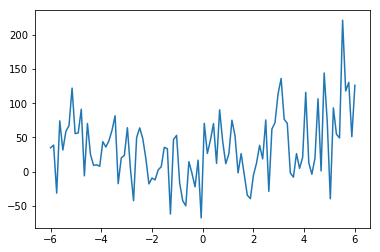

[iteration 0050] loss: 449507.3750
[iteration 0100] loss: 424226.2500
[iteration 0150] loss: 383704.3438
[iteration 0200] loss: 298695.1875
[iteration 0250] loss: 269796.4062
[iteration 0300] loss: 269481.7500
[iteration 0350] loss: 269434.5312
[iteration 0400] loss: 269386.4062
[iteration 0450] loss: 269335.9062
[iteration 0500] loss: 269283.3125
weight_vector
linear.weight
linear.bias
yeh


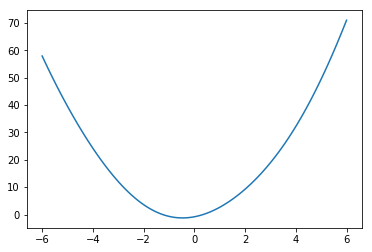

In [16]:
N = 100
sigma = 50
p = 1
def toy_data(N,sigma):
    x = np.linspace(-6,6,N)
    y =  3*np.sin(x) + 3*x**2 + 3*x + np.random.normal(0,sigma, N)
    x, y = x.reshape((N,1)), y.reshape((N,1))
    x,y = Variable(torch.Tensor(x)), Variable(torch.Tensor(y))
    return torch.cat((x,y),1)

data_look = toy_data(N,sigma)
x_look  = data_look[:,0].data.numpy()
y_look =  data_look[:,1].data.numpy()
plt.plot(x_look, y_look)
print('woo')
plt.show()

class Vanilla_Regression(nn.Module):
    def __init__(self, p):
        super(Vanilla_Regression, self).__init__()
        self.linear = nn.Linear(p,1)
        self.weight_vector = nn.Parameter(torch.rand(1,3))
        
    def forward(self, x):
        w = self.weight_vector
        X = torch.mul(w[:,0], 3*torch.sin(x)) + torch.mul(w[:,1], torch.pow(x,2)) + torch.mul(w[:,2], x)
        return self.linear(X)
        

vanilla_regression_model = Vanilla_Regression(p) 
criterion = torch.nn.MSELoss(size_average = False)
optim = torch.optim.Adam(vanilla_regression_model.parameters(), lr  = 0.01)
epoch = 500
param_list = []
def main():
    data = toy_data(N,sigma)
    x_data = data[:,:-1]
    y_data = data[:,-1]
    for run in range(epoch):
        y_pred = vanilla_regression_model(x_data)
        loss = criterion(y_pred,y_data)
        optim.zero_grad()
        loss.backward()
        optim.step()
        if (run +1)% 50 == 0:
            print("[iteration %04d] loss: %.4f" % (run + 1, loss.data[0]))
        
    for name, param in vanilla_regression_model.named_parameters():
        param_list.append(param.data.numpy())
        print(name)
    def generated_data(N,param_list):
        x = np.linspace(-6,6,N)
        
        y = float(param_list[0][0][0])*(np.sin(x)) + float(param_list[0][0][1])*(x**2) + float(param_list[0][0][2])*(x) 
        y =  float(param_list[0][0][1])*(y) +  float(param_list[0][0][2])
        x, y = x.reshape((N,1)), y.reshape((N,1))
        x,y = Variable(torch.Tensor(x)), Variable(torch.Tensor(y))
        return torch.cat((x,y),1)
    data_loo = generated_data(N,param_list)
    x_loo  = data_loo[:,0].data.numpy()
    y_loo =  data_loo[:,1].data.numpy()
    plt.plot(x_loo, y_loo)
    print('yeh')
    plt.show()

if __name__ == '__main__':
    main()

this is okay


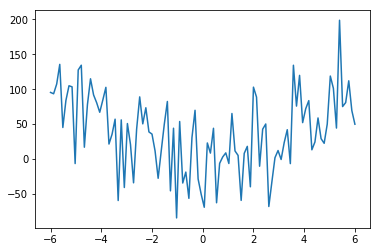

[iteration 0001] loss: 585.1416
[iteration 0101] loss: 115.9363
[iteration 0201] loss: 8.8366
[iteration 0301] loss: 3.4679
[iteration 0401] loss: 4.1058
yehhhh


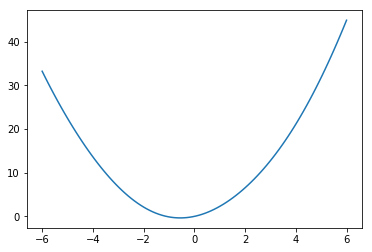

In [15]:
N = 100
sigma = 50
p = 1
def build_linear_dataset(N,sigma):
    x = np.linspace(-6,6,N)
    y =  3*np.sin(x) + 3*x**2 + 3*x + np.random.normal(0,sigma, N)
    x, y = x.reshape((N,1)), y.reshape((N,1))
    x,y = Variable(torch.Tensor(x)), Variable(torch.Tensor(y))
    return torch.cat((x,y),1)


data_lo = build_linear_dataset(N,sigma)
x_lo = data_lo[:,0].data.numpy()
y_lo=  data_lo[:,1].data.numpy()
print('this is okay')
plt.plot(x_lo, y_lo)
plt.show()





class RegressionModel(nn.Module):
    def __init__(self, p):
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(p, 1)
        self.weight_vector = nn.Parameter(torch.rand(1,3))
        

    def forward(self, x):
        w = self.weight_vector
        x = torch.mul(w[:,0], 3*torch.sin(x)) + torch.mul(w[:,1], torch.pow(x,2)) + torch.mul(w[:,2], x)
        return self.linear(x)
            
        
        return self.linear(X)

regression_model = RegressionModel(p)

def model(data):
    # Create unit normal priors over the parameters
    x_data = data[:, :-1]
    y_data = data[:, -1]
    mu, sigma = Variable(torch.zeros(1, p)), Variable(10 * torch.ones(1, p))
    bias_mu, bias_sigma = Variable(torch.zeros(1)), Variable(10 * torch.ones(1))
    wv_mu, wv_sigma = Variable(torch.zeros(1, 3)), Variable(15 * torch.ones(1, 3))
    w_prior, b_prior, wv_prior = Normal(mu, sigma), Normal(bias_mu, bias_sigma), Normal(wv_mu, wv_sigma)
    priors = {'linear.weight': w_prior, 'linear.bias': b_prior, 'weight_vector': wv_prior}
    # lift module parameters to random variables sampled from the priors
    lifted_module = pyro.random_module("module", regression_model, priors)
    # sample a regressor (which also samples w and b)
    lifted_reg_model = lifted_module()
    # run the regressor forward conditioned on data
    prediction_mean = lifted_reg_model(x_data).squeeze()
    # condition on the observed data
    pyro.observe("obs", Normal(prediction_mean, Variable(2 * torch.ones(data.size(0)))), y_data.squeeze())

    
softplus = torch.nn.Softplus()

def guide(data):
    
    w_mu = Variable(torch.randn(1, p), requires_grad=True)
    w_log_sig = Variable(-3.0 * torch.ones(1, p) + 0.05 * torch.randn(1, p),
                         requires_grad=True)
    
    b_mu = Variable(torch.randn(1), requires_grad=True)
    b_log_sig = Variable(-3.0 * torch.ones(1) + 0.05 * torch.randn(1),
                         requires_grad=True)
    
    wv_mu = Variable(torch.randn(1,3), requires_grad=True)
    wv_log_sig = Variable(-3.0 * torch.ones(1,3) + 0.05 * torch.randn(1,3),
                         requires_grad=True)
    
    # register learnable params in the param store
    mw_param = pyro.param("guide_mean_weight", w_mu)
    sw_param = softplus(pyro.param("guide_log_sigma_weight", w_log_sig))
    
    mb_param = pyro.param("guide_mean_bias", b_mu)
    sb_param = softplus(pyro.param("guide_log_sigma_bias", b_log_sig))
    
    mwv_param = pyro.param("guide_mean_weight_vector", wv_mu)
    swv_param = softplus(pyro.param("guide_log_sigma_weight_vector", wv_log_sig))    
    
    
    # guide distributions for w and b
    w_dist, b_dist, wv_dist = Normal(mw_param, sw_param), Normal(mb_param, sb_param), Normal(mwv_param, swv_param)
    
    dists = {'linear.weight': w_dist, 'linear.bias': b_dist,'weight_vector': wv_dist}
    # overload the parameters in the module with random samples
    lifted_module = pyro.random_module("module", regression_model, dists)
    # sample a regressor (which also samples w and b)
    return lifted_module()


optim = Adam({"lr": 0.01})
svi = SVI(model, guide, optim, loss="ELBO")
epoch = 500
def main():
    pyro.clear_param_store()
    data = build_linear_dataset(N, p)
    for j in range(epoch):
        # calculate the loss and take a gradient step
        loss = svi.step(data)
        if j % 100 == 0:
            print("[iteration %04d] loss: %.4f" % (j + 1, loss / float(N)))
    param_list = {}
    for name in pyro.get_param_store().get_all_param_names():
        param_list[name] = pyro.param(name).data.numpy()

    def generated_data(N,param_list):
        x = np.linspace(-6, 6, num=N)
        y = float(param_list['guide_mean_weight_vector'][0][0])*np.sin(x)
        y += float(param_list['guide_mean_weight_vector'][0][1])*x**2
        y += float(param_list['guide_mean_weight_vector'][0][2])*x
        y =  float(param_list['guide_mean_weight'])*(y) + float(param_list['guide_mean_bias'])*(y)


        x, y = x.reshape((N,1)), y.reshape((N,1))
        x,y = Variable(torch.Tensor(x)),Variable(torch.Tensor(y))
        return torch.cat((x,y),1)
    data_loo = generated_data(N,param_list)
    x_loo  = data_loo[:,0].data.numpy()
    y_loo =  data_loo[:,1].data.numpy()
    plt.plot(x_loo, y_loo)
    print('yehhhh')
    plt.show()            
            
            
            
if __name__ == '__main__':
    main()


